In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Modelos
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df_sales = pd.read_csv('sales_data.csv')
df_sales.head()

,Date,Store,Category,Units_Sold,Unit_Price
0,2024-01-01,101,Electronics,30,299.99
1,2024-01-01,102,Clothing,45,49.99
2,2024-01-01,103,Home Goods,20,19.99
3,2024-01-02,101,Electronics,25,299.99
4,2024-01-02,102,Clothing,50,49.99


In [11]:
df_sales.shape

(110, 5)

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        110 non-null    object 
 1   Store       110 non-null    int64  
 2   Category    110 non-null    object 
 3   Units_Sold  110 non-null    int64  
 4   Unit_Price  110 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.4+ KB


In [7]:
df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,110.0,102.018182,0.823751,101.00,101.00,102.00,103.00,103.00
Units_Sold,110.0,35.309091,12.986758,15.00,25.25,32.00,44.25,62.00
Unit_Price,110.0,121.444545,125.711453,19.99,19.99,49.99,299.99,299.99


In [8]:
df_sales.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [16]:
print("Las tiendas son:",*df_sales['Store'].unique())


Las tiendas son: 101 102 103


In [22]:
print("Las categorías son:",df_sales['Category'].unique())

Las categorías son: ['Electronics' 'Clothing' 'Home Goods']


In [24]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [ ]:

df_sales['Mes'] = df_sales['Date'].dt.month     
df_sales['Día_de_la_semana'] = df_sales['Date'].dt.day_name() 
df_sales['Trimestre'] = df_sales['Date'].dt.quarter   
print(df_sales.head())

        Date  Store     Category  Units_Sold  Unit_Price  Mes  \
0 2024-01-01    101  Electronics          30      299.99    1   
1 2024-01-01    102     Clothing          45       49.99    1   
2 2024-01-01    103   Home Goods          20       19.99    1   
3 2024-01-02    101  Electronics          25      299.99    1   
4 2024-01-02    102     Clothing          50       49.99    1   

  Día_de_la_semana  Trimestre  
0           Monday          1  
1           Monday          1  
2           Monday          1  
3          Tuesday          1  
4          Tuesday          1  


In [ ]:

print(df_sales[['Units_Sold','Unit_Price']].describe().T)


            count        mean         std    min    25%    50%     75%     max
Units_Sold  110.0   35.309091   12.986758  15.00  25.25  32.00   44.25   62.00
Unit_Price  110.0  121.444545  125.711453  19.99  19.99  49.99  299.99  299.99


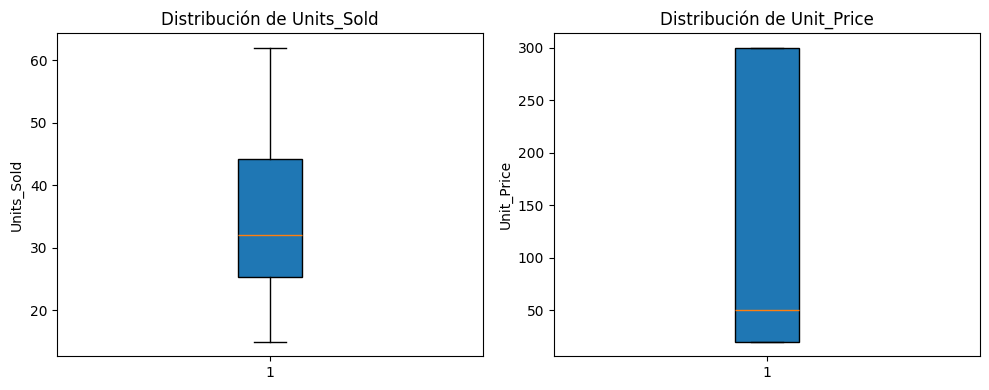

In [29]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df_sales['Units_Sold'], vert=True, patch_artist=True)
plt.title("Distribución de Units_Sold")
plt.ylabel("Units_Sold")

plt.subplot(1, 2, 2)
plt.boxplot(df_sales['Unit_Price'], vert=True, patch_artist=True)
plt.title("Distribución de Unit_Price")
plt.ylabel("Unit_Price")

plt.tight_layout()
plt.show()

In [ ]:
print("Frecuencia de tiendas:")
print(df_sales['Store'].value_counts())

print("Frecuencia de categorías:")
print(df_sales['Category'].value_counts())

Frecuencia de tiendas:
Store
103    38
101    36
102    36
Name: count, dtype: int64
Frecuencia de categorías:
Category
Home Goods     38
Electronics    36
Clothing       36
Name: count, dtype: int64


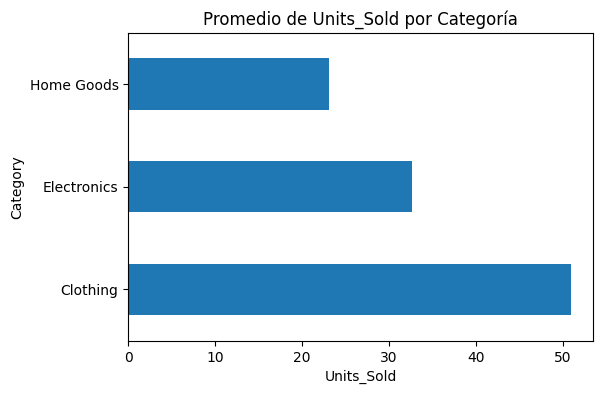

In [ ]:

plt.figure(figsize=(6, 4))
df_sales.groupby('Category')['Units_Sold'].mean().plot(kind='barh')
plt.title("Promedio de Units_Sold por Categoría")
plt.ylabel("Category")
plt.xlabel("Units_Sold")
plt.show()

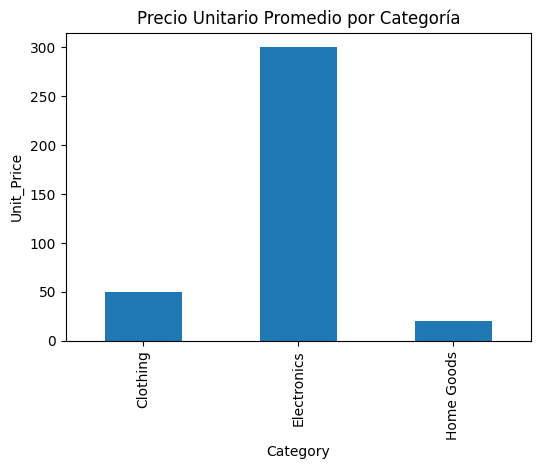

In [ ]:

plt.figure(figsize=(6, 4))
df_sales.groupby('Category')['Unit_Price'].mean().plot(kind='bar')
plt.title("Precio Unitario Promedio por Categoría")
plt.ylabel("Unit_Price")
plt.xlabel("Category")
plt.show()

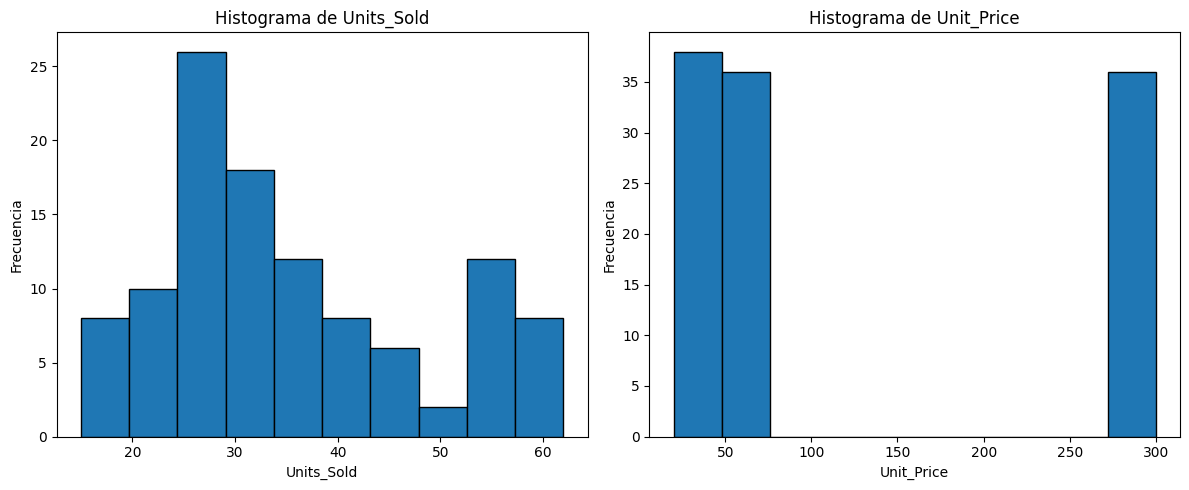

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_sales['Units_Sold'], bins=10, edgecolor='black')
plt.title("Histograma de Units_Sold")
plt.xlabel("Units_Sold")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(df_sales['Unit_Price'], bins=10, edgecolor='black')
plt.title("Histograma de Unit_Price")
plt.xlabel("Unit_Price")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:

df_sales['Ingresos'] = df_sales['Units_Sold'] * df_sales['Unit_Price']

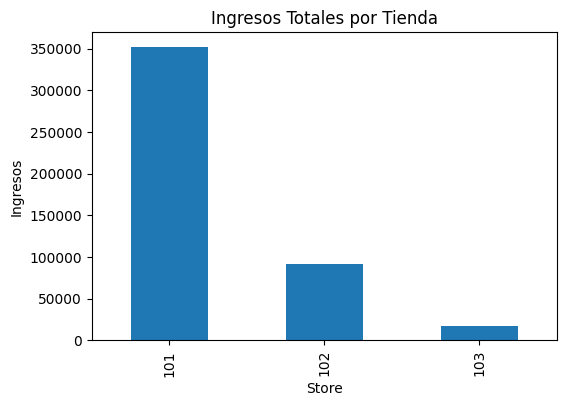

In [ ]:
plt.figure(figsize=(6, 4))
df_sales.groupby('Store')['Ingresos'].sum().plot(kind='bar')
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos")
plt.xlabel("Store")
plt.show()

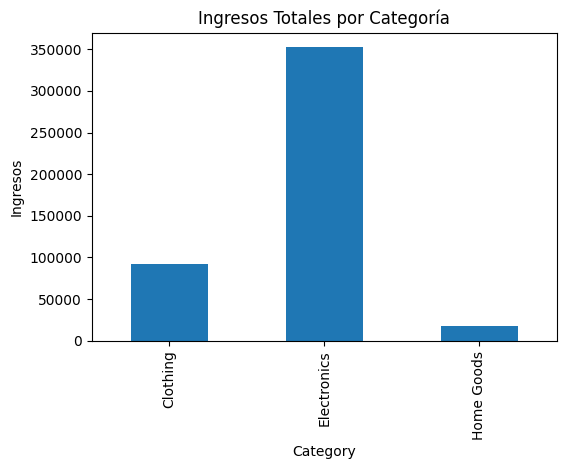

In [ ]:
plt.figure(figsize=(6, 4))
df_sales.groupby('Category')['Ingresos'].sum().plot(kind='bar')
plt.title("Ingresos Totales por Categoría")
plt.ylabel("Ingresos")
plt.xlabel("Category")
plt.show()

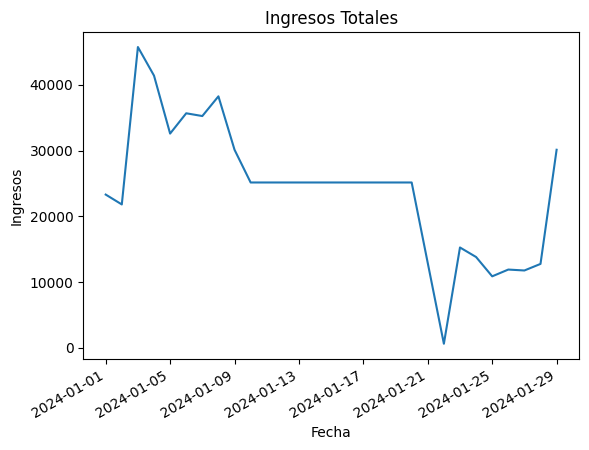

In [ ]:
df_sales.groupby('Date')['Ingresos'].sum().plot(kind='line')
plt.title("Ingresos Totales")
plt.ylabel("Ingresos")
plt.xlabel("Fecha")
plt.show()

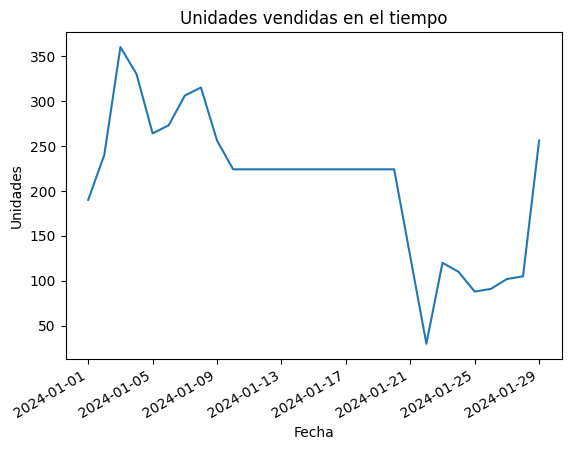

In [ ]:
df_sales.groupby('Date')['Units_Sold'].sum().plot(kind='line')
plt.title("Unidades vendidas en el tiempo")
plt.ylabel("Unidades")
plt.xlabel("Fecha")
plt.show()

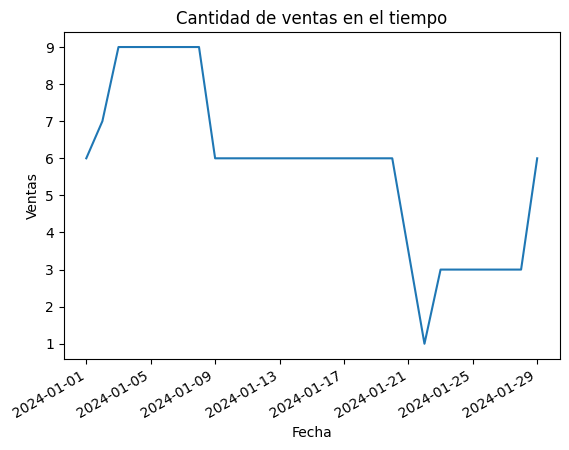

In [ ]:
df_sales.groupby('Date')['Units_Sold'].count().plot(kind='line')
plt.title("Cantidad de ventas en el tiempo")
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.show()

Día_de_la_semana
Wednesday    38.555556
Tuesday      38.500000
Monday       35.954545
Thursday     34.833333
Sunday       34.250000
Saturday     33.277778
Friday       29.583333
Name: Units_Sold, dtype: float64


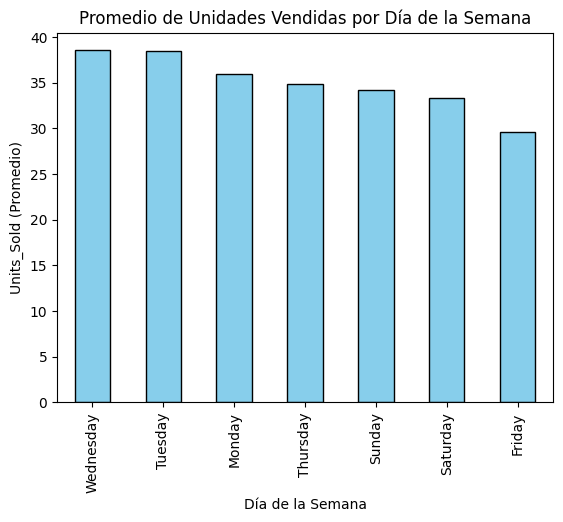

In [ ]:


ventas_dow = df_sales.groupby('Día_de_la_semana')['Units_Sold'].mean().sort_values(ascending=False)
print(ventas_dow)

ventas_dow.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Promedio de Unidades Vendidas por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Units_Sold (Promedio)")
plt.show()


Es_fin_de_semana
False    35.925000
True     33.666667
Name: Units_Sold, dtype: float64


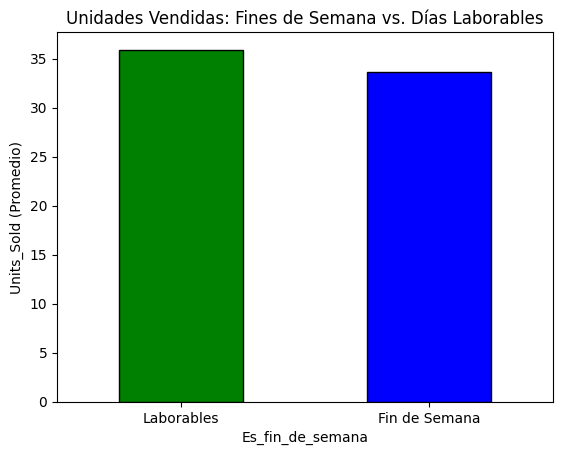

In [ ]:
df_sales['Es_fin_de_semana'] = df_sales['Día_de_la_semana'].isin(['Saturday','Sunday'])

weekend_vs_weekday = df_sales.groupby('Es_fin_de_semana')['Units_Sold'].mean()
print(weekend_vs_weekday)

weekend_vs_weekday.plot(kind='bar', color=['green','blue'], edgecolor='black')
plt.title("Unidades Vendidas: Fines de Semana vs. Días Laborables")
plt.xticks([0,1], ['Laborables','Fin de Semana'], rotation=0)
plt.ylabel("Units_Sold (Promedio)")
plt.show()

            Units_Sold  Unit_Price
Units_Sold    1.000000   -0.057934
Unit_Price   -0.057934    1.000000


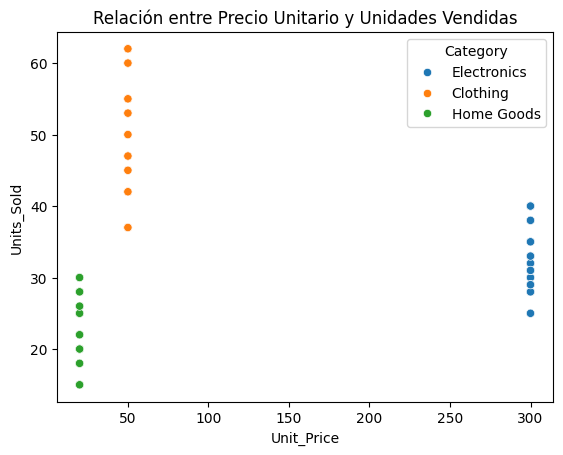

In [56]:
import seaborn as sns

corr_matrix = df_sales[['Units_Sold','Unit_Price']].corr()
print(corr_matrix)

# Scatter plot
sns.scatterplot(data=df_sales, x='Unit_Price', y='Units_Sold', hue='Category')
plt.title("Relación entre Precio Unitario y Unidades Vendidas")
plt.show()


In [57]:
pivot_store_cat = pd.pivot_table(df_sales,
                                 values='Units_Sold',
                                 index='Store',
                                 columns='Category',
                                 aggfunc='sum')
print(pivot_store_cat)


Category  Clothing  Electronics  Home Goods
Store                                      
101            NaN       1174.0         NaN
102         1834.0          NaN         NaN
103            NaN          NaN       876.0


       Units_Sold   Ingresos
Store                       
101          1174  352188.26
102          1834   91681.66
103           876   17511.24


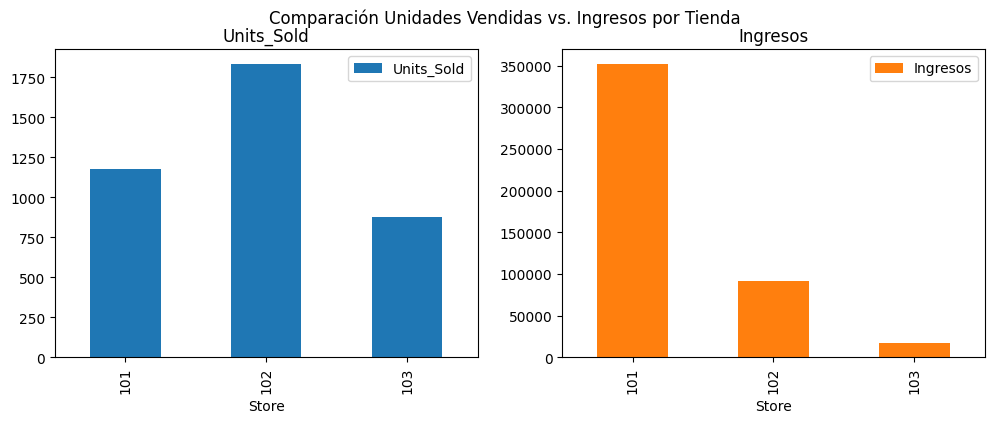

In [58]:
pivot_ingresos_unidades = df_sales.groupby('Store')[['Units_Sold','Ingresos']].sum()
print(pivot_ingresos_unidades)

pivot_ingresos_unidades.plot(kind='bar', subplots=True, layout=(1,2), figsize=(12,4))
plt.suptitle("Comparación Unidades Vendidas vs. Ingresos por Tienda")
plt.show()


In [60]:
from scipy import stats

df_sales['z_score_units'] = stats.zscore(df_sales['Units_Sold'])
outliers_units = df_sales[df_sales['z_score_units'].abs() > 3]  # threshold común = 3
print("Outliers en Units_Sold según Z-score:")
print(outliers_units)


Outliers en Units_Sold según Z-score:
Empty DataFrame
Columns: [Date, Store, Category, Units_Sold, Unit_Price, Mes, Día_de_la_semana, Trimestre, Ingresos, Es_fin_de_semana, z_score_units]
Index: []


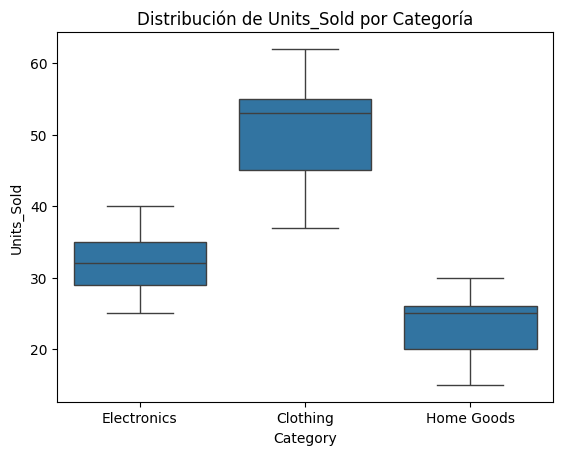

In [61]:
sns.boxplot(data=df_sales, x='Category', y='Units_Sold')
plt.title("Distribución de Units_Sold por Categoría")
plt.show()


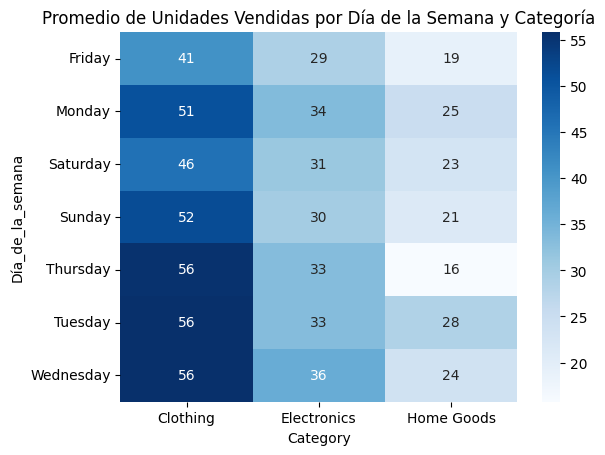

In [62]:
pivot_dow_cat = pd.pivot_table(df_sales,
                               values='Units_Sold',
                               index='Día_de_la_semana',
                               columns='Category',
                               aggfunc='mean')

sns.heatmap(pivot_dow_cat, annot=True, cmap='Blues')
plt.title("Promedio de Unidades Vendidas por Día de la Semana y Categoría")
plt.show()


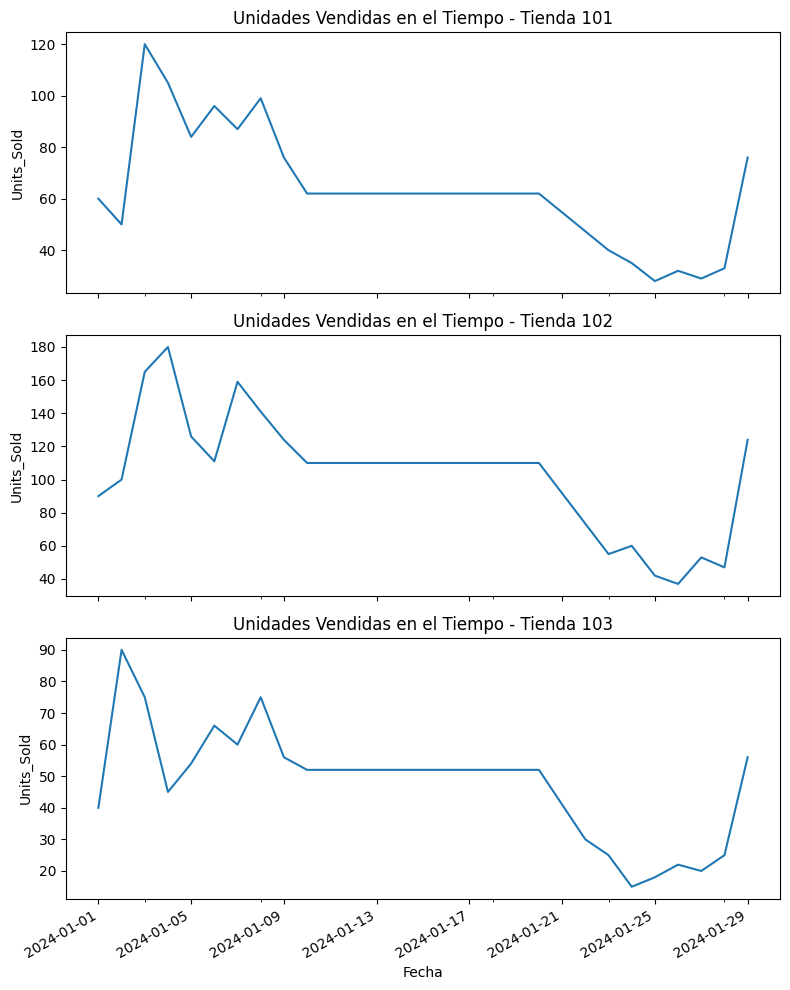

In [63]:
stores = df_sales['Store'].unique()

fig, axes = plt.subplots(nrows=len(stores), ncols=1, figsize=(8, 10), sharex=True)

for i, store in enumerate(stores):
    df_temp = df_sales[df_sales['Store'] == store]
    df_temp.groupby('Date')['Units_Sold'].sum().plot(ax=axes[i])
    axes[i].set_title(f"Unidades Vendidas en el Tiempo - Tienda {store}")
    axes[i].set_xlabel("Fecha")
    axes[i].set_ylabel("Units_Sold")

plt.tight_layout()
plt.show()


In [69]:
df_sales.groupby(['Store', 'Category']).count().head()

,,Date,Units_Sold,Unit_Price,Mes,Día_de_la_semana,Trimestre,Ingresos,Es_fin_de_semana,z_score_units
Store,Category,,,,,,,,,
101,Electronics,36,36,36,36,36,36,36,36,36
102,Clothing,36,36,36,36,36,36,36,36,36
103,Home Goods,38,38,38,38,38,38,38,38,38


In [94]:
df_sales = pd.read_csv('sales_data.csv')
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Mes'] = df_sales['Date'].dt.month
df_sales['Día_de_la_semana'] = df_sales['Date'].dt.day_name()
df_sales['Trimestre'] = df_sales['Date'].dt.quarter
df_sales['Day_of_Month'] = df_sales['Date'].dt.day
df_sales['Es_fin_de_semana'] = df_sales['Día_de_la_semana'].isin(['Saturday','Sunday']).astype(int)

In [ ]:
df_sales = df_sales.sort_values('Date')
train = df_sales[df_sales['Date'] < '2024-01-26']
test  = df_sales[df_sales['Date'] >= '2024-01-26']

In [ ]:
numeric_features = ['Unit_Price', 'Day_of_Month']
categorical_features = ['Store', 'Category', 'Día_de_la_semana', 'Es_fin_de_semana']

X_train = train[numeric_features + categorical_features]
y_train = train['Units_Sold']
X_test = test[numeric_features + categorical_features]
y_test = test['Units_Sold']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

preprocessor.fit(X_train)

joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocesador guardado en 'preprocessor.pkl'")

Preprocesador guardado en 'preprocessor.pkl'


In [114]:

X_train_processed = preprocessor.transform(X_train)
num_feature_names = numeric_features
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([num_feature_names, cat_feature_names])
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
print("DataFrame procesado (preview):")
X_train_processed_df.head()

DataFrame procesado (preview):


,Unit_Price,Day_of_Month,Store_101,Store_102,Store_103,Category_Clothing,Category_Electronics,Category_Home Goods,Día_de_la_semana_Friday,Día_de_la_semana_Monday,Día_de_la_semana_Saturday,Día_de_la_semana_Sunday,Día_de_la_semana_Thursday,Día_de_la_semana_Tuesday,Día_de_la_semana_Wednesday,Es_fin_de_semana_0,Es_fin_de_semana_1
0,1.429871,-1.069524,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.568919,-1.069524,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.808774,-1.069524,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.429871,-1.069524,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.568919,-1.069524,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [117]:
# Diccionario con los modelos y sus pipelines
pipelines = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Lasso': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Lasso(random_state=42, max_iter=10000))
    ]),
    'Ridge': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(random_state=42))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ]),
    'AdaBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', AdaBoostRegressor(random_state=42))
    ])
}

In [ ]:
param_grid = {
    'Linear Regression': {},
    'Lasso': {
        'regressor__alpha': [0.01, 0.1, 1, 10]
    },
    'Ridge': {
        'regressor__alpha': [0.01, 0.1, 1, 10]
    },
    'Decision Tree': {
        'regressor__max_depth': [None, 5, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 5, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 1]
    }
}


In [ ]:

best_models = {}
results = {}

for model_name, pipeline in pipelines.items():
    print(f"\nEntrenando modelo: {model_name}")
    grid = GridSearchCV(pipeline,
                        param_grid=param_grid[model_name],
                        cv=3,
                        scoring='neg_mean_absolute_error',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    best_params = grid.best_params_
    y_pred = grid.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'Best Params': best_params, 'MAE': mae, 'RMSE': rmse, 'R2': r2}
    print(f"Mejores parámetros para {model_name}: {best_params}")
    print(f"{model_name}: MAE = {mae:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.2f}")




Entrenando modelo: Linear Regression
Mejores parámetros para Linear Regression: {}
Linear Regression: MAE = 4.90, RMSE = 5.77, R2 = 0.80

Entrenando modelo: Lasso
Mejores parámetros para Lasso: {'regressor__alpha': 0.01}
Lasso: MAE = 4.88, RMSE = 5.75, R2 = 0.80

Entrenando modelo: Ridge
Mejores parámetros para Ridge: {'regressor__alpha': 0.01}
Ridge: MAE = 4.90, RMSE = 5.77, R2 = 0.80

Entrenando modelo: Decision Tree


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros para Decision Tree: {'regressor__max_depth': None, 'regressor__min_samples_split': 2}
Decision Tree: MAE = 8.27, RMSE = 10.00, R2 = 0.41

Entrenando modelo: Random Forest


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros para Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Random Forest: MAE = 5.88, RMSE = 7.18, R2 = 0.69

Entrenando modelo: Gradient Boosting


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros para Gradient Boosting: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
Gradient Boosting: MAE = 7.15, RMSE = 9.57, R2 = 0.46

Entrenando modelo: AdaBoost
Mejores parámetros para AdaBoost: {'regressor__learning_rate': 0.01, 'regressor__n_estimators': 50}
AdaBoost: MAE = 4.74, RMSE = 5.97, R2 = 0.79


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [129]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [132]:
results_df = pd.DataFrame(results)
print("\nComparación de Modelos:")
results_df.T


Comparación de Modelos:


,Best Params,MAE,RMSE,R2
Linear Regression,{},4.898829,5.769296,0.802888
Lasso,{'regressor__alpha': 0.01},4.877437,5.750103,0.804197
Ridge,{'regressor__alpha': 0.01},4.897605,5.768729,0.802927
Decision Tree,"{'regressor__max_depth': None, 'regressor__min...",8.266667,10.0,0.407801
Random Forest,"{'regressor__max_depth': None, 'regressor__min...",5.878667,7.181675,0.694565
Gradient Boosting,"{'regressor__learning_rate': 0.01, 'regressor_...",7.154495,9.569622,0.457678
AdaBoost,"{'regressor__learning_rate': 0.01, 'regressor_...",4.737302,5.969076,0.789


In [137]:
pd.set_option('display.max_colwidth', None) 

In [138]:
print("Mejores parámetros iniciales por modelo:")
print(results_df.T['Best Params'])

Mejores parámetros iniciales por modelo:
Linear Regression                                                                                                  {}
Lasso                                                                                      {'regressor__alpha': 0.01}
Ridge                                                                                      {'regressor__alpha': 0.01}
Decision Tree                                       {'regressor__max_depth': None, 'regressor__min_samples_split': 2}
Random Forest        {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Gradient Boosting        {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 50}
AdaBoost                                            {'regressor__learning_rate': 0.01, 'regressor__n_estimators': 50}
Name: Best Params, dtype: object


In [ ]:
refined_grids = {
    'Linear Regression': {}, 
    'Lasso': {
        'regressor__alpha': [0.005, 0.01, 0.02]
    },
    'Ridge': {
        'regressor__alpha': [0.005, 0.01, 0.02]
    },
    'Decision Tree': {
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 3, 4]
    },
    'Random Forest': {
        'regressor__n_estimators': [25, 50, 75],
        'regressor__max_depth': [None, 5, 10],
        'regressor__min_samples_split': [2, 3, 4]
    },
    'Gradient Boosting': {
        'regressor__n_estimators': [25, 50, 75],
        'regressor__learning_rate': [0.005, 0.01, 0.02],
        'regressor__max_depth': [2, 3, 4]
    },
    'AdaBoost': {
        'regressor__n_estimators': [25, 50, 75],
        'regressor__learning_rate': [0.005, 0.01, 0.02]
    }
}
refined_best_models = {}
refined_results = {}

for model_name, pipeline in pipelines.items():
    print(f"\nRefinando modelo: {model_name}")
    grid = GridSearchCV(pipeline,
                        param_grid=refined_grids[model_name],
                        cv=3,
                        scoring='neg_mean_absolute_error',
                        n_jobs=-1)
    grid.fit(X_train, y_train)
    refined_best_models[model_name] = grid.best_estimator_
    best_params_refined = grid.best_params_
    y_pred_refined = grid.best_estimator_.predict(X_test)
    mae_refined = mean_absolute_error(y_test, y_pred_refined)
    rmse_refined = np.sqrt(mean_squared_error(y_test, y_pred_refined))
    r2_refined = r2_score(y_test, y_pred_refined)
    refined_results[model_name] = {
        'Best Refined Params': best_params_refined, 
        'MAE': mae_refined, 'RMSE': rmse_refined, 'R2': r2_refined
    }
    print(f"Mejores parámetros refinados para {model_name}: {best_params_refined}")
    print(f"{model_name} (Refinado): MAE = {mae_refined:.2f}, RMSE = {rmse_refined:.2f}, R2 = {r2_refined:.2f}")



Refinando modelo: Linear Regression


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Mejores parámetros refinados para Linear Regression: {}
Linear Regression (Refinado): MAE = 4.90, RMSE = 5.77, R2 = 0.80

Refinando modelo: Lasso


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Mejores parámetros refinados para Lasso: {'regressor__alpha': 0.005}
Lasso (Refinado): MAE = 4.89, RMSE = 5.76, R2 = 0.80

Refinando modelo: Ridge


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Mejores parámetros refinados para Ridge: {'regressor__alpha': 0.005}
Ridge (Refinado): MAE = 4.90, RMSE = 5.77, R2 = 0.80

Refinando modelo: Decision Tree


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros refinados para Decision Tree: {'regressor__max_depth': None, 'regressor__min_samples_split': 2}
Decision Tree (Refinado): MAE = 8.27, RMSE = 10.00, R2 = 0.41

Refinando modelo: Random Forest


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros refinados para Random Forest: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 25}
Random Forest (Refinado): MAE = 5.87, RMSE = 7.15, R2 = 0.70

Refinando modelo: Gradient Boosting


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros refinados para Gradient Boosting: {'regressor__learning_rate': 0.005, 'regressor__max_depth': 2, 'regressor__n_estimators': 25}
Gradient Boosting (Refinado): MAE = 9.11, RMSE = 11.75, R2 = 0.18

Refinando modelo: AdaBoost
Mejores parámetros refinados para AdaBoost: {'regressor__learning_rate': 0.005, 'regressor__n_estimators': 25}
AdaBoost (Refinado): MAE = 4.68, RMSE = 5.70, R2 = 0.81


c:\Users\LagAl\.conda\envs\technical_test\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [140]:
refined_results_df = pd.DataFrame(refined_results).T
print("\nComparación de Modelos Refinados:")
refined_results_df


Comparación de Modelos Refinados:


,Best Refined Params,MAE,RMSE,R2
Linear Regression,{},4.898829,5.769296,0.802888
Lasso,{'regressor__alpha': 0.005},4.888159,5.759636,0.803548
Ridge,{'regressor__alpha': 0.005},4.898217,5.769012,0.802907
Decision Tree,"{'regressor__max_depth': None, 'regressor__min_samples_split': 2}",8.266667,10.0,0.407801
Random Forest,"{'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 25}",5.874667,7.150444,0.697216
Gradient Boosting,"{'regressor__learning_rate': 0.005, 'regressor__max_depth': 2, 'regressor__n_estimators': 25}",9.113314,11.747991,0.182675
AdaBoost,"{'regressor__learning_rate': 0.005, 'regressor__n_estimators': 25}",4.681087,5.69881,0.807675



Coeficientes para Linear Regression:
                       Feature  Coefficient
5            Category_Clothing     7.569183
3                    Store_102     7.569183
4                    Store_103    -6.511928
7          Category_Home Goods    -6.511928
8      Día_de_la_semana_Friday    -5.624080
13    Día_de_la_semana_Tuesday     4.111812
14  Día_de_la_semana_Wednesday     3.365401
6         Category_Electronics    -1.057255
2                    Store_101    -1.057255
10   Día_de_la_semana_Saturday    -0.903342
9      Día_de_la_semana_Monday    -0.810284
16          Es_fin_de_semana_1    -0.660729
15          Es_fin_de_semana_0     0.660729
0                   Unit_Price    -0.551314
1                 Day_of_Month     0.414708
12   Día_de_la_semana_Thursday    -0.382120
11     Día_de_la_semana_Sunday     0.242614


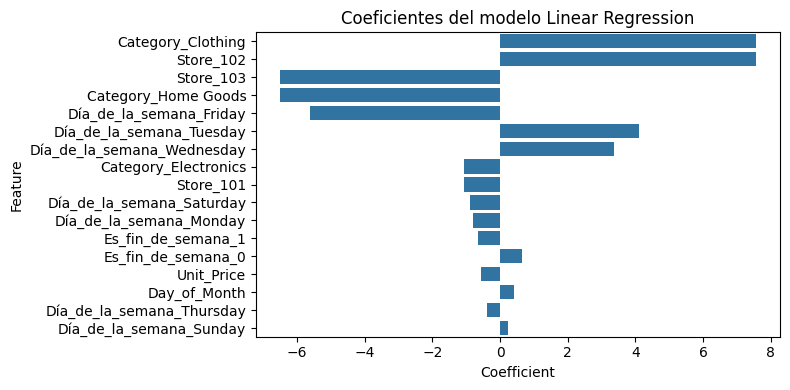


Coeficientes para Lasso:
                       Feature  Coefficient
3                    Store_102    18.340059
4                    Store_103    -8.681320
8      Día_de_la_semana_Friday    -4.986068
13    Día_de_la_semana_Tuesday     4.667814
14  Día_de_la_semana_Wednesday     3.925731
10   Día_de_la_semana_Saturday    -1.112502
7          Category_Home Goods    -0.979015
15          Es_fin_de_semana_0     0.492838
1                 Day_of_Month     0.412060
9      Día_de_la_semana_Monday    -0.195802
12   Día_de_la_semana_Thursday     0.165178
0                   Unit_Price     0.000000
11     Día_de_la_semana_Sunday     0.000000
6         Category_Electronics     0.000000
5            Category_Clothing     0.000000
2                    Store_101     0.000000
16          Es_fin_de_semana_1    -0.000000


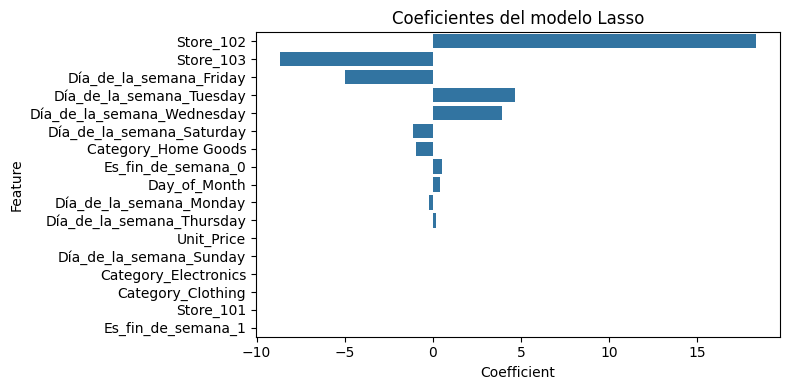


Coeficientes para Ridge:
                       Feature  Coefficient
5            Category_Clothing     7.568586
3                    Store_102     7.568586
4                    Store_103    -6.511405
7          Category_Home Goods    -6.511405
8      Día_de_la_semana_Friday    -5.621135
13    Día_de_la_semana_Tuesday     4.110222
14  Día_de_la_semana_Wednesday     3.364220
6         Category_Electronics    -1.057181
2                    Store_101    -1.057181
10   Día_de_la_semana_Saturday    -0.903200
9      Día_de_la_semana_Monday    -0.810295
16          Es_fin_de_semana_1    -0.660798
15          Es_fin_de_semana_0     0.660798
0                   Unit_Price    -0.551291
1                 Day_of_Month     0.414831
12   Día_de_la_semana_Thursday    -0.382214
11     Día_de_la_semana_Sunday     0.242403


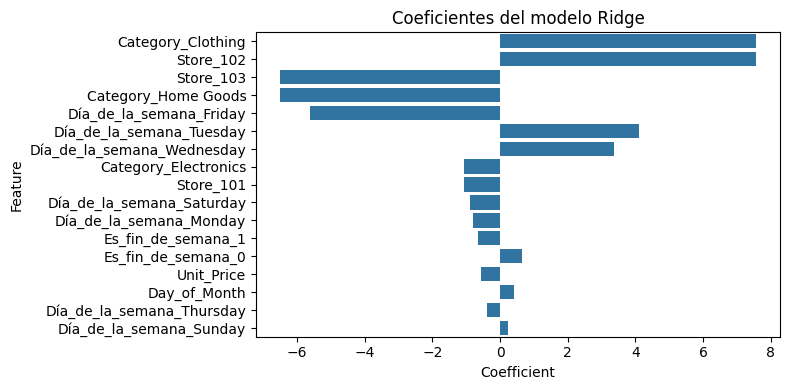

In [148]:
linear_models = ['Linear Regression', 'Lasso', 'Ridge']
for model_name in linear_models:
    model_pipeline = refined_best_models[model_name]
    regressor_linear = model_pipeline.named_steps['regressor']
    coefs = regressor_linear.coef_
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
    coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
    print(f"\nCoeficientes para {model_name}:")
    print(coef_df)
    plt.figure(figsize=(8, 4))
    sns.barplot(data=coef_df, x='Coefficient', y='Feature')
    plt.title(f'Coeficientes del modelo {model_name}')
    plt.tight_layout()
    plt.show()